# Анализ воронки

## Разбираем файл

In [1]:
import csv

funnel = {'1_home_page': 0, '2_search_page': 0, '3_payment_page': 0, '4_payment_confirmation_page': 0}
funnel_by_gender = {}

with open(r"click_stream.csv", mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    for row in csv_reader:  # корректный отступ цикла
        
        page = list(row.items())[1][1]
        event_date = list(row.items())[2][1][:-3]
        device = list(row.items())[3][1]
        gender = list(row.items())[4][1]

        if gender not in funnel_by_gender:
            funnel_by_gender[gender] = {}

        if device not in funnel_by_gender[gender]:
            funnel_by_gender[gender][device] = {}

        if event_date not in funnel_by_gender[gender][device]:
            funnel_by_gender[gender][device][event_date] = funnel.copy()
            
        if page in funnel_by_gender[gender][device][event_date]:
            funnel_by_gender[gender][device][event_date][page] += 1
    
        
funnel_by_gender

{'Male': {'Desktop': {'2015-02': {'1_home_page': 7602,
    '2_search_page': 3832,
    '3_payment_page': 586,
    '4_payment_confirmation_page': 28},
   '2015-03': {'1_home_page': 7538,
    '2_search_page': 3663,
    '3_payment_page': 134,
    '4_payment_confirmation_page': 8},
   '2015-04': {'1_home_page': 7559,
    '2_search_page': 3836,
    '3_payment_page': 164,
    '4_payment_confirmation_page': 13},
   '2015-01': {'1_home_page': 7504,
    '2_search_page': 3678,
    '3_payment_page': 596,
    '4_payment_confirmation_page': 27}},
  'Mobile': {'2015-01': {'1_home_page': 3682,
    '2_search_page': 2963,
    '3_payment_page': 551,
    '4_payment_confirmation_page': 53},
   '2015-04': {'1_home_page': 3829,
    '2_search_page': 755,
    '3_payment_page': 148,
    '4_payment_confirmation_page': 13},
   '2015-03': {'1_home_page': 3812,
    '2_search_page': 762,
    '3_payment_page': 160,
    '4_payment_confirmation_page': 10},
   '2015-02': {'1_home_page': 3799,
    '2_search_page': 3035,


## Импортируем библиотеку **pandas** и **matplotlib.pyplot**. Создаем датафрейм и сводную таблицу

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
rows = []
for gender, devices in funnel_by_gender.items():
    for device, dates in devices.items():
        for date, pages in dates.items():
            for page, value in pages.items():
                rows.append([gender, device, date, page, value])

df_stage = pd.DataFrame(rows, columns=['Gender', 'Device', 'Date', 'Page', 'Value'])

In [22]:
df_stage.sample(5)

,Gender,Device,Date,Page,Value
16,Male,Mobile,2015-01,1_home_page,3682
31,Male,Mobile,2015-02,4_payment_confirmation_page,59
20,Male,Mobile,2015-04,1_home_page,3829
22,Male,Mobile,2015-04,3_payment_page,148
27,Male,Mobile,2015-03,4_payment_confirmation_page,10


In [23]:
df_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  64 non-null     object
 1   Device  64 non-null     object
 2   Date    64 non-null     object
 3   Page    64 non-null     object
 4   Value   64 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.6+ KB


In [31]:
# количество пропущенных значений для всех столбцов
df_stage.isna().sum()

Gender    0
Device    0
Date      0
Page      0
Value     0
dtype: int64

> **<span style="color:green"> с данными все в порядке можно продолжать исследование </span>**

In [4]:
df_page = pd.DataFrame(df_stage.groupby('Page').agg({'Value': sum}), columns=[ 'Value']).reset_index()
df_page['%'] = round(df_page['Value'] / df_page['Value'].max() * 100, 2)
df_page

C:\Users\a-o-b\AppData\Local\Temp\ipykernel_3716\162000962.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_page = pd.DataFrame(df_stage.groupby('Page').agg({'Value': sum}), columns=[ 'Value']).reset_index()


,Page,Value,%
0,1_home_page,90399,100.00
1,2_search_page,45200,50.00
2,3_payment_page,6030,6.67
3,4_payment_confirmation_page,452,0.50


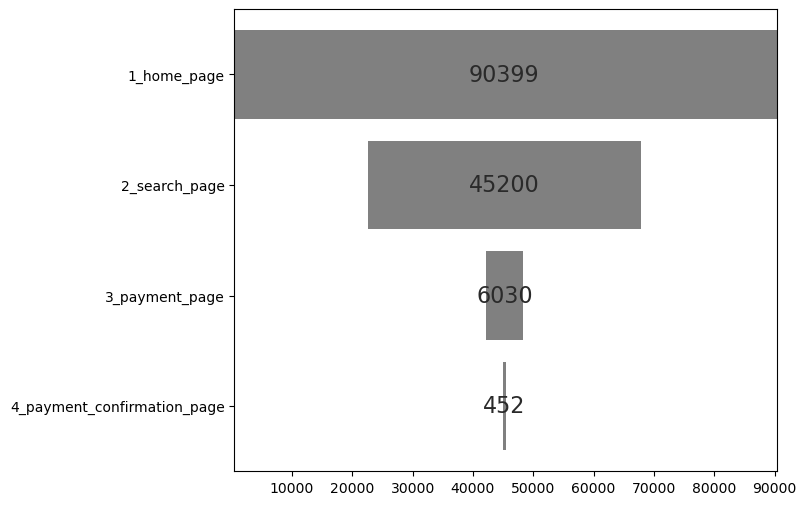

In [5]:
df_page_reversed = df_page.iloc[::-1].reset_index(drop=True)

fig, ax = plt.subplots(1, figsize=(7,6))
for idx, val in enumerate(df_page_reversed['Value']):
    left = (df_page_reversed['Value'].max() - val) / 2
    plt.barh(
        y=df_page_reversed['Page'][idx],
        width=val,
        left=left,
        color='gray'
    )
    # Посчитать центр бара = смещение + половина ширины
    text_x = left + val / 2
    text_y = df_page_reversed['Page'][idx]
     # value
    plt.text(text_x, text_y,  # координаты
        df_page_reversed['Value'][idx],  # текст
        ha='center',  # горизонтальное выравнивание
        va='center',  # вертикальное выравнивание
        fontsize=16,
        color='#2A2A2A')

plt.xlim(df_page_reversed['Value'].min(), df_page_reversed['Value'].max())
plt.show()

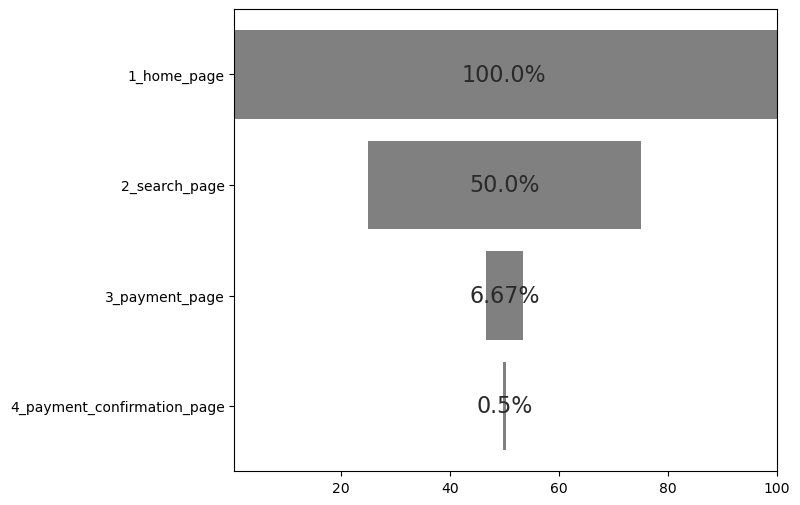

In [6]:
fig, ax = plt.subplots(1, figsize=(7,6))
for idx, val in enumerate(df_page_reversed['%']):
    left = (df_page_reversed['%'].max() - val) / 2
    plt.barh(
        y=df_page_reversed['Page'][idx],
        width=val,
        left=left,
        color='gray'
    )
    # Посчитать центр бара = смещение + половина ширины
    text_x = left + val / 2
    text_y = df_page_reversed['Page'][idx]
     # value
    plt.text(text_x, text_y,  # координаты
        f'{df_page_reversed['%'][idx]}%',  # текст
        ha='center',  # горизонтальное выравнивание
        va='center',  # вертикальное выравнивание
        fontsize=16,
        color='#2A2A2A')

plt.xlim(df_page_reversed['%'].min(), df_page_reversed['%'].max())
plt.show()

> **<span style="color:red">конверсия состовляет всего 0.5%</span>**

## Эволюция воронки со временем

In [7]:
df_date = df_stage.pivot_table(index=['Page'], columns='Date', values='Value', aggfunc='sum').reset_index()
df_date

Date,Page,2015-01,2015-02,2015-03,2015-04
0,1_home_page,22600,22599,22600,22600
1,2_search_page,13554,13687,8879,9080
2,3_payment_page,2390,2412,631,597
3,4_payment_confirmation_page,189,173,44,46


#### таблица в процентах

In [8]:
df_norm = df_date.set_index('Page').apply(lambda col: round(col / col.max() * 100, 2)).reset_index()
df_norm

Date,Page,2015-01,2015-02,2015-03,2015-04
0,1_home_page,100.00,100.00,100.00,100.00
1,2_search_page,59.97,60.56,39.29,40.18
2,3_payment_page,10.58,10.67,2.79,2.64
3,4_payment_confirmation_page,0.84,0.77,0.19,0.20


> **<span style="color:red">конверсия значительно падает у покупателей примерно в 4 раза</span>**

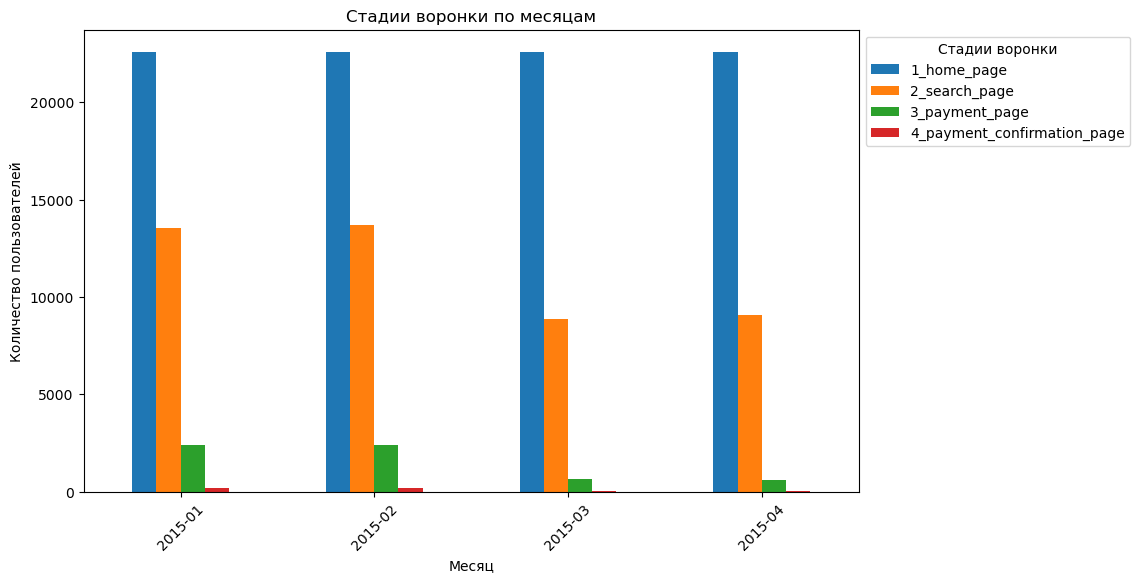

In [9]:
# Транспонируем датафрейм для построения графика
df_date_T = df_date.set_index('Page').T
# Построение графика
df_date_T.plot(kind='bar', figsize=(10, 6))
plt.title("Стадии воронки по месяцам")
plt.ylabel("Количество пользователей")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.legend(title="Стадии воронки",
    bbox_to_anchor=(1, 1),
    loc='upper left')
plt.show()


### Создадим отдельный график для отображение колонки с совершенными действиями 

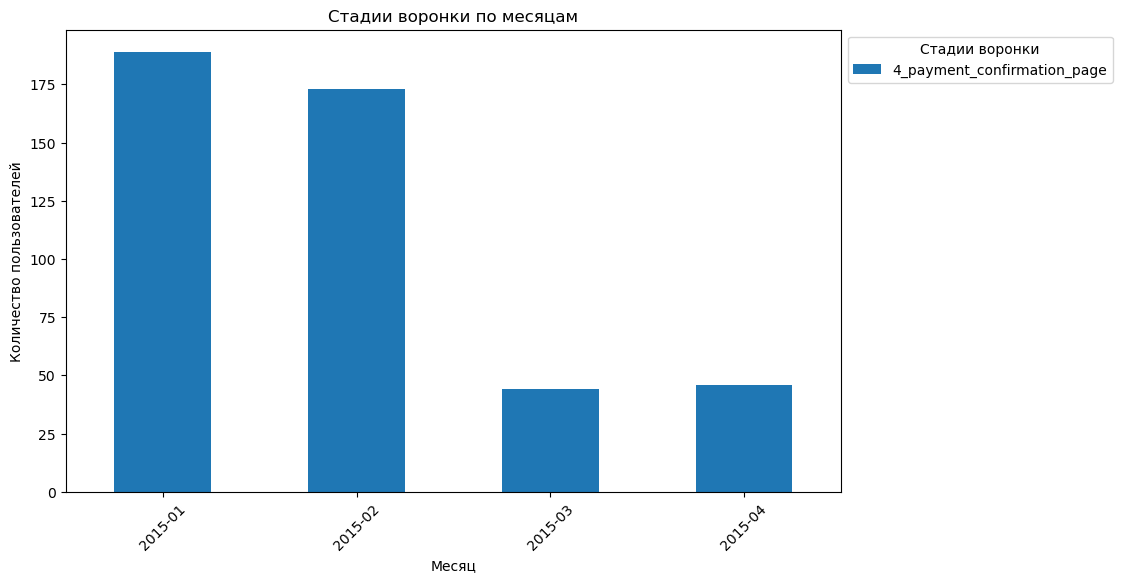

In [10]:
# Построение графика
df_date_T['4_payment_confirmation_page'].plot(kind='bar', figsize=(10, 6))
plt.title("Стадии воронки по месяцам")
plt.ylabel("Количество пользователей")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.legend(title="Стадии воронки",
    bbox_to_anchor=(1, 1),
    loc='upper left')
plt.show()

> **<span style="color:red">Что-то произошло между февралем и мартом, из-за чего произошел значительный регресс во всех частях воронки</span>**

### Рассмотрим влияние устройств на конверсию

#### телефоны

In [11]:
df_mobile =  df_stage[df_stage['Device'] == 'Mobile'].pivot_table(index=['Page'], columns='Date', values='Value',  aggfunc='sum').reset_index()
df_mobile

Date,Page,2015-01,2015-02,2015-03,2015-04
0,1_home_page,7550,7550,7550,7550
1,2_search_page,6025,6055,1509,1511
2,3_payment_page,1169,1221,335,295
3,4_payment_confirmation_page,129,119,30,24


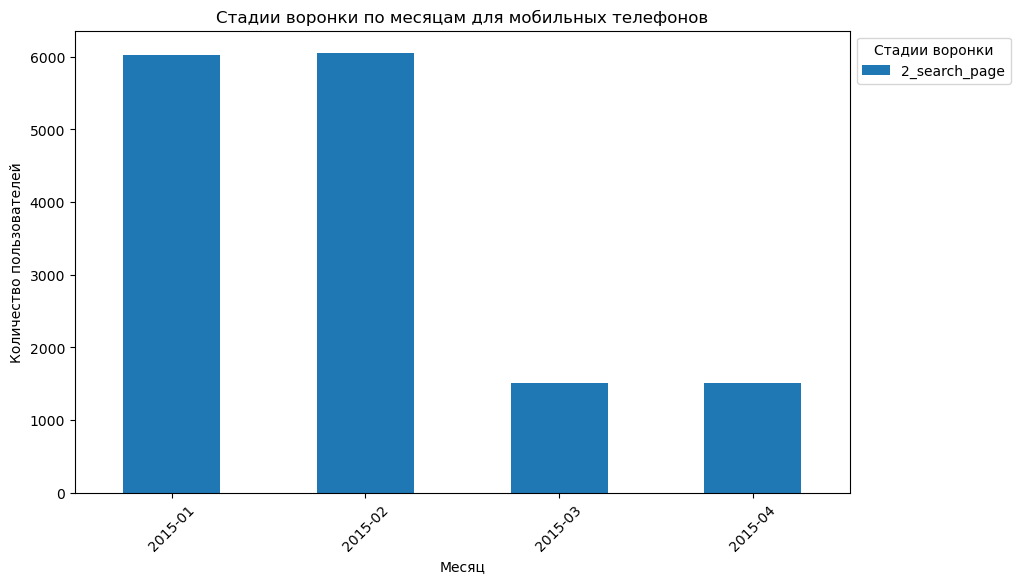

In [12]:
df_mobile_T = df_mobile.set_index('Page').T
# Построение графика
df_mobile_T['2_search_page'].plot(kind='bar', figsize=(10, 6))
plt.title("Стадии воронки по месяцам для мобильных телефонов")
plt.ylabel("Количество пользователей")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.legend(title="Стадии воронки",
    bbox_to_anchor=(1, 1),
    loc='upper left')
plt.show()

> **<span style="color:red">просадки на страничке поиска</span>**

#### компьютеры

In [13]:
df_desktop =  df_stage[df_stage['Device'] == 'Desktop'].pivot_table(index=['Page'], columns='Date', values='Value',  aggfunc='sum').reset_index()
df_desktop

Date,Page,2015-01,2015-02,2015-03,2015-04
0,1_home_page,15050,15049,15050,15050
1,2_search_page,7529,7632,7370,7569
2,3_payment_page,1221,1191,296,302
3,4_payment_confirmation_page,60,54,14,22


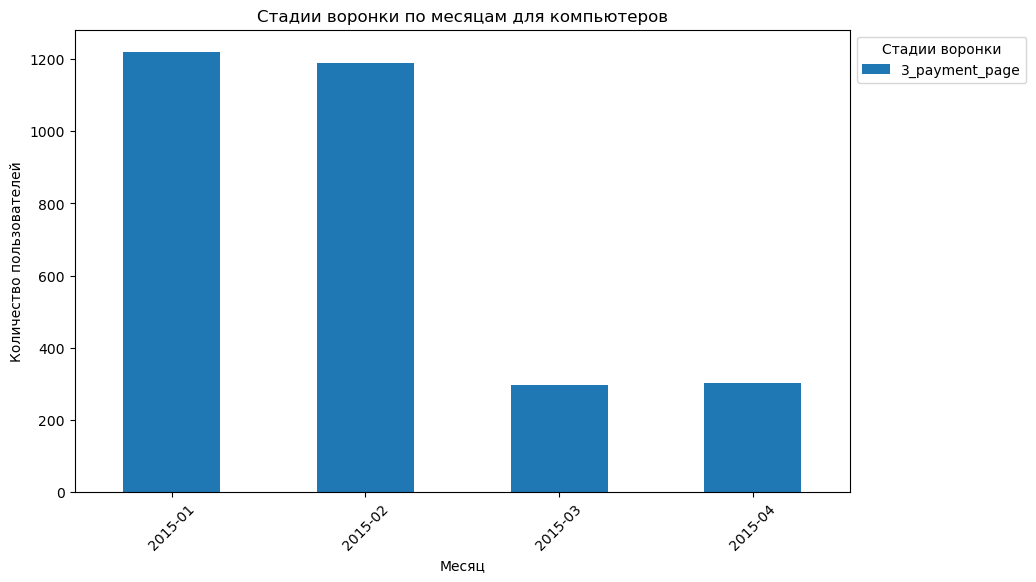

In [14]:
df_desktop_T = df_desktop.set_index('Page').T
# Построение графика
df_desktop_T['3_payment_page'].plot(kind='bar', figsize=(10, 6))
plt.title("Стадии воронки по месяцам для компьютеров")
plt.ylabel("Количество пользователей")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.legend(title="Стадии воронки",
    bbox_to_anchor=(1, 1),
    loc='upper left')
plt.show()

> **<span style="color:red">просадки на страничке оплаты</span>**

### Проверим влияние на конверсию в зависимости от поля

### Мужчины

In [15]:
df_stage[df_stage['Gender'] == 'Male'].sample(5)

,Gender,Device,Date,Page,Value
26,Male,Mobile,2015-03,3_payment_page,160
4,Male,Desktop,2015-03,1_home_page,7538
22,Male,Mobile,2015-04,3_payment_page,148
25,Male,Mobile,2015-03,2_search_page,762
28,Male,Mobile,2015-02,1_home_page,3799


#### Создание сводной таблицы

In [16]:
pivot_table_m = df_stage[df_stage['Gender'] == 'Male'].pivot_table(index=['Page'], columns=['Gender', 'Device', 'Date'], values='Value')
pivot_table_m = pivot_table_m.astype('int64')

#### Отображение таблицы

In [17]:
pivot_table_m.style.background_gradient(cmap='Blues')

### Женщины

In [18]:
df_stage[df_stage['Gender'] == 'Female'].sample(5)

,Gender,Device,Date,Page,Value
49,Female,Mobile,2015-04,2_search_page,756
32,Female,Desktop,2015-03,1_home_page,7512
44,Female,Desktop,2015-04,1_home_page,7491
62,Female,Mobile,2015-01,3_payment_page,618
36,Female,Desktop,2015-01,1_home_page,7546


#### Создание сводной таблицы

In [19]:
pivot_table_f = df_stage[df_stage['Gender'] == 'Female'].pivot_table(index=['Page'], columns=['Gender', 'Device', 'Date'], values='Value')
pivot_table_f = pivot_table_f.astype('int64')

#### Отображение таблицы

In [20]:
pivot_table_f.style.background_gradient(cmap='RdPu')

In [ ]:

# Преобразование вложенного словаря в DataFrame
data = []

for gender, devices in funnel_by_gender.items():
    for device, dates in devices.items():
        for event_date, pages in dates.items():
            row = {"Gender": gender, "Device": device, "Date": event_date}
            row.update(pages)
            data.append(row)

# Создаем DataFrame
df = pd.DataFrame(data)

# Группируем данные для наглядной визуализации
grouped_df = df.groupby(["Gender", "Device"])[['1_home_page', '2_search_page', '3_payment_page', '4_payment_confirmation_page']].sum()

# Построение графика
grouped_df.plot(kind='bar', figsize=(12, 6))
plt.title("Стадии воронки по полу и устройству")
plt.ylabel("Количество пользователей")
plt.xlabel("Пол, Устройство")
plt.xticks(rotation=45)
plt.legend(title="Стадии воронки")
plt.show()


> **<span style="color:green">мужчины предпочитают совершать покупки больше через компьютер, а женщины предпочитают телефон</span>**

##  Итоговые выводы и рекомендации

### Выводы

1. **Общая конверсия составляет всего ~0.5%**  
   Большая часть пользователей отваливается на страницах поиска или оплаты.

2. **Конверсия заметно снижается с февраля по март**  
   Возможны сезонные колебания или технические проблемы на сайте.

3. **Мобильные пользователи чаще всего теряются на странице поиска**  
   Необходимо улучшить юзабилити поиска на мобильных устройствах.

4. **Десктоп-пользователи сталкиваются с трудностями на этапе оплаты**  
   Следует проверить интерфейс платежной страницы для ПК.

5. **Мужчины чаще совершают покупки через десктоп**  
   Это можно учесть при настройке рекламных кампаний и UX-доработок.

---

### Рекомендации

- Провести **UX-исследование** страниц поиска и оплаты.
- Проверить **скорость загрузки** и отсутствие технических ошибок.
- Запустить **A/B-тесты** для новых версий страниц.
- Разработать **гипотезы по удержанию пользователей** между этапами.
- Настроить **персонализированные предложения** для ключевых сегментов пользователей.

---

**Итог:** Проблемы и точки роста определены — следующий шаг: приоритизация и реализация улучшений!
